<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/mobile2.png?raw=true" width=800 align="left"/>

# 실습 내용

- Grid Search로 Decision Tree 알고리즘 모델을 튜닝합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/mobile.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [ ]:
# 상위 몇 개 행 확인
data.head()

In [ ]:
# 기술통계 확인
data.describe()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 변수 제거**

In [3]:
# 제거 대상: id
del_cols = ['id']

# 변수 제거
data.drop(del_cols, axis=1, inplace=True)

# 확인
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


**2) x, y 분리**

In [4]:
# Target 설정
target = 'CHURN'

# 데이터 분리
X = data.drop(target, axis=1)
y = data.loc[:, target]


**3) 가변수화**

In [8]:
# 가변수화 대상: REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN
dumm_cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']

# 가변수화
X = pd.get_dummies(X, columns = dumm_cols, drop_first=True, dtype=int)

# 확인
list(X)

['COLLEGE',
 'INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION',
 'REPORTED_SATISFACTION_sat',
 'REPORTED_SATISFACTION_unsat',
 'REPORTED_SATISFACTION_very_sat',
 'REPORTED_SATISFACTION_very_unsat',
 'REPORTED_USAGE_LEVEL_high',
 'REPORTED_USAGE_LEVEL_little',
 'REPORTED_USAGE_LEVEL_very_high',
 'REPORTED_USAGE_LEVEL_very_little',
 'CONSIDERING_CHANGE_OF_PLAN_considering',
 'CONSIDERING_CHANGE_OF_PLAN_never_thought',
 'CONSIDERING_CHANGE_OF_PLAN_no',
 'CONSIDERING_CHANGE_OF_PLAN_perhaps']

**4) 학습용, 평가용 데이터 분리**

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 4.성능 예측

- k-Fold Cross Validation을 사용해 모델의 성능을 예측합니다.

In [11]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [12]:
# 선언하기
model_dt = DecisionTreeClassifier()

In [15]:
# 성능예측
cv_score = cross_val_score(model_dt, X_train, y_train, cv=10, scoring='accuracy')

In [16]:
# 결과확인
print(cv_score)
print(cv_score.mean())


[0.61071429 0.61214286 0.62571429 0.61571429 0.62142857 0.59857143
 0.61571429 0.62642857 0.635      0.59857143]
0.616


# 5.모델 튜닝


- Grid Search로 튜닝을 진행합니다.

**1) 모델 튜닝**

In [17]:
# 파라미터 선언
  # max_depth: range(1, 51)
param = {
    'max_depth':range(1,51)
}

# Grid Search 선언
  # cv=5
  # scoring='accuracy'
model = GridSearchCV(model_dt,
                    param,
                    cv=10,
                    scoring='accuracy')


In [18]:
# 학습하기
model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 51)}, scoring='accuracy')

**2) 결과 확인**

In [21]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 '

In [27]:
model.best_params_

{'max_depth': 4}

In [20]:
model.cv_results_

{'mean_fit_time': array([0.01649821, 0.02540901, 0.03492215, 0.04985912, 0.05971372,
        0.06949079, 0.0753819 , 0.09063683, 0.1019419 , 0.11503141,
        0.12625072, 0.14192283, 0.15069454, 0.15854857, 0.16559803,
        0.17179039, 0.17773366, 0.18848214, 0.20019782, 0.20302823,
        0.20866153, 0.21097107, 0.2154422 , 0.20964317, 0.2243659 ,
        0.23560276, 0.24008873, 0.23465405, 0.23281264, 0.26556618,
        0.23899491, 0.23754606, 0.23882391, 0.25103967, 0.24049203,
        0.24490657, 0.23714347, 0.23991137, 0.25130641, 0.24494779,
        0.25339091, 0.24372044, 0.24780905, 0.24756639, 0.24603112,
        0.25378354, 0.24656067, 0.24172764, 0.2428477 , 0.24365184]),
 'std_fit_time': array([0.00143858, 0.00204957, 0.00356052, 0.00146358, 0.00250771,
        0.00503107, 0.00197725, 0.00533036, 0.00521918, 0.00412939,
        0.00367098, 0.00519893, 0.00621448, 0.0039325 , 0.00525543,
        0.00880481, 0.00311529, 0.00893112, 0.01105454, 0.00552219,
        0.007

In [32]:
# mean_test_score 확인
print('mean_test_score : ',model.cv_results_['mean_test_score'])
print('best parameter : ', model.best_params_)
print('best score : ', model.best_score_)

mean_test_score :  [0.61292857 0.65728571 0.69307143 0.69892857 0.69814286 0.69542857
 0.68907143 0.68485714 0.68192857 0.67492857 0.6695     0.66714286
 0.66214286 0.65728571 0.65442857 0.64278571 0.64114286 0.63585714
 0.63221429 0.62871429 0.62692857 0.62235714 0.61935714 0.61842857
 0.61621429 0.61457143 0.61671429 0.61628571 0.61635714 0.61564286
 0.61       0.61885714 0.61364286 0.61264286 0.61657143 0.61735714
 0.61357143 0.61542857 0.61292857 0.61       0.61614286 0.60957143
 0.61221429 0.61235714 0.611      0.61157143 0.61728571 0.61407143
 0.61407143 0.61478571]
best parameter :  {'max_depth': 4}
best score :  0.6989285714285715


**3) 변수 중요도**

<BarContainer object of 20 artists>

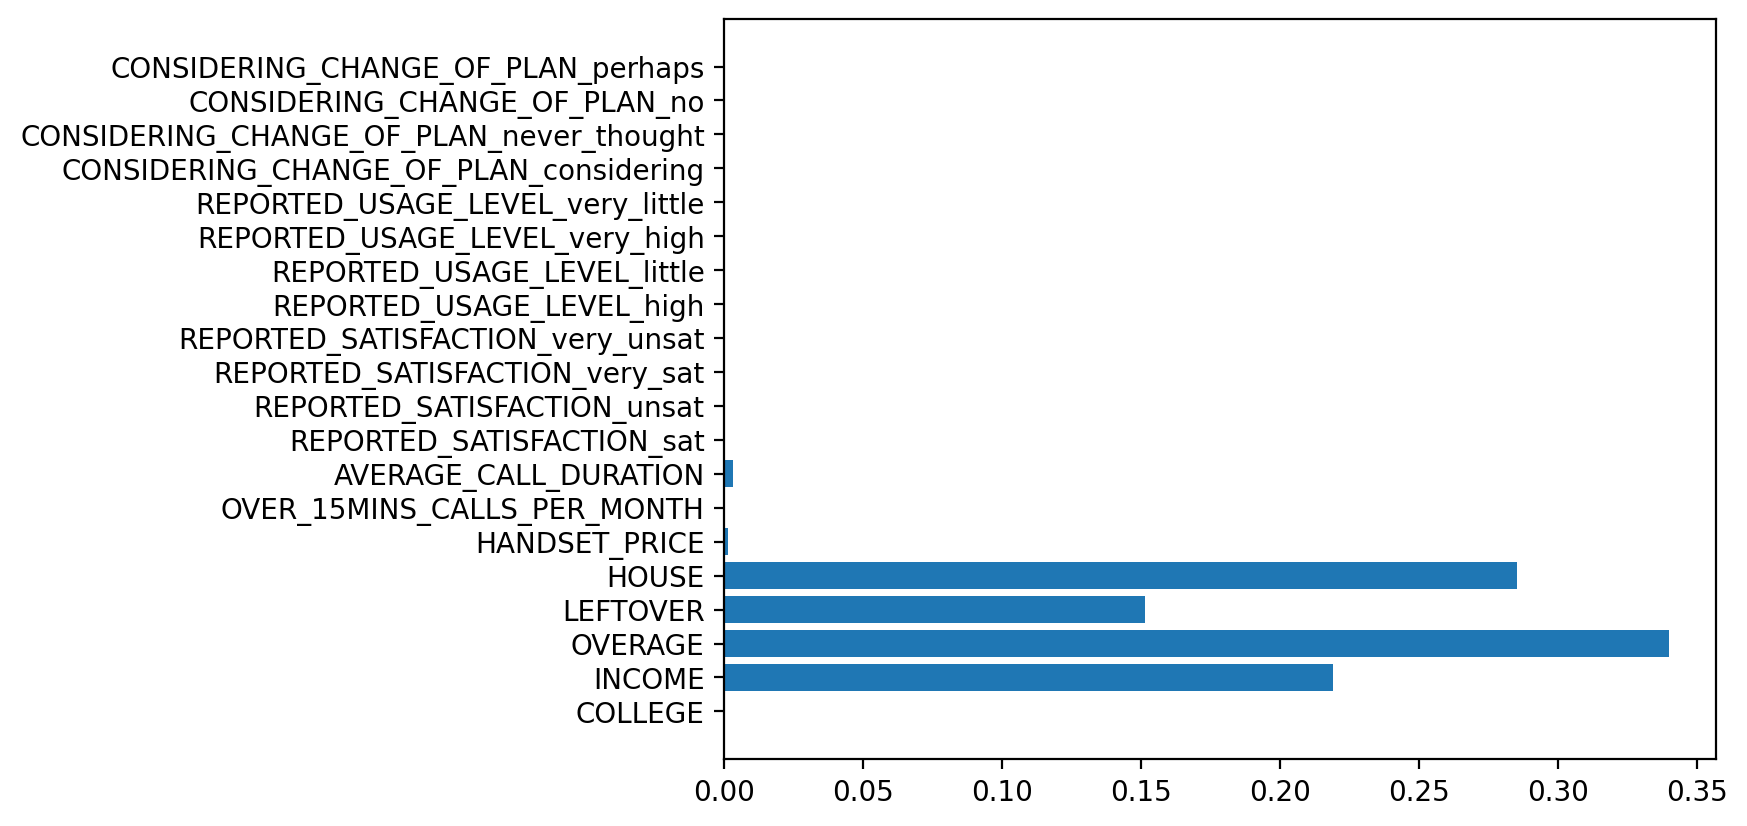

In [34]:
# 변수 중요도
plt.barh(y=list(X), width =model.best_estimator_.feature_importances_)



# 6. 성능 평가

- 학습을 통해 예상한 성능과 실제 평가에 따른 성능은 차이가 있을 수 있습니다.
- 예선전에서 성적이 좋았다고 본선에서도 성적이 좋다고 보장할 수는 없겠지요?

In [35]:
# 예측하기
y_pred = model.predict(X_test)

In [37]:
# 평가하기
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.62      0.68      2980
           1       0.68      0.79      0.73      3020

    accuracy                           0.71      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.71      0.71      0.71      6000

